In [2]:
os.chdir("projects_on_GitHub/POC/python_probability_practices")

## Hypothesis Testing

### Example: Average height of all individuals are higher than 70 or not?
Whether the average height of coffee drinkers (including both coffee drinkers and non-coffee drinkers) is higher than 70 or not?

$$H_0: \mu_0 \leq 70$$

$$H_1: \mu_0 \gt 70$$

In [5]:
df = pd.read_csv('coffee_dataset.csv')
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [8]:
np.random.seed(42)
sample150 = df.sample(150)
sample150.shape

(150, 4)

In [9]:
mns = []
for _ in range(10000):
    bootstrap = sample150.sample(150, replace=True)
    mns.append(bootstrap.height.mean())

In [12]:
lower_bound, upper_bound = np.percentile(mns, [2.5, 97.5])
lower_bound, upper_bound

(67.10258508046547, 68.15617490636113)

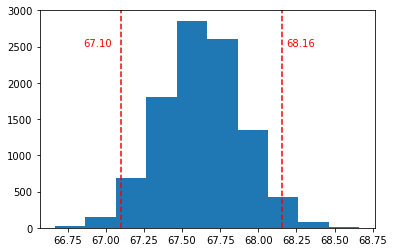

In [25]:
plt.hist(mns)

plt.axvline(lower_bound, color='red', linestyle='--')
plt.axvline(upper_bound, color='red', linestyle='--')

plt.text(lower_bound-.25, 2500, s="{:.2f}".format(lower_bound), color='red')
plt.text(upper_bound+.03, 2500, s="{:.2f}".format(upper_bound), color='red');

**Conclusion:** we believe the average height of the individuals in the dataset is less than 70.